# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [1]:
# student 1: Nitzan 9470

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [2]:
import pandas as pd

# Load datasets
train_data = pd.read_csv('titanic_train.csv')
test_data = pd.read_csv('titanic_test.csv')

# Display the first 5 rows of each dataset
print("Train Data:")
print(train_data.head())

print("\nTest Data:")
print(test_data.head())

Train Data:
   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Survived
0       1    0  54.0      1      0  78.2667         1         1
1       2    0  45.0      0      0  13.5000         0         1
2       3    1  20.0      0      0   9.5000         0         0
3       3    1  36.0      0      0   7.8958         0         0
4       3    1  22.0      0      0   8.0500         0         0

Test Data:
   Pclass  Sex        Age  SibSp  Parch     Fare  Embarked  Survived
0       3    1  35.000000      0      0   7.0500         0         0
1       3    1  30.000000      0      0   7.2500         0         0
2       3    1  29.699118      0      0  14.5000         0         0
3       3    0  21.000000      0      0   7.7500         2         0
4       3    1  32.000000      0      0  56.4958         0         1


Train Data Description:
           Pclass         Sex         Age       SibSp       Parch        Fare    Embarked    Survived
count  712.000000  712.000000  712.000000  712.000000  712.000000  712.000000  712.000000  712.000000
mean     2.294944    0.640449   29.531213    0.528090    0.384831   32.379429    0.372191    0.394663
std      0.841990    0.480206   13.188028    1.055052    0.803085   49.836074    0.649970    0.489122
min      1.000000    0.000000    0.670000    0.000000    0.000000    0.000000    0.000000    0.000000
25%      1.750000    0.000000   22.000000    0.000000    0.000000    7.925000    0.000000    0.000000
50%      3.000000    1.000000   29.699118    0.000000    0.000000   14.500000    0.000000    0.000000
75%      3.000000    1.000000   35.000000    1.000000    0.000000   31.275000    1.000000    1.000000
max      3.000000    1.000000   80.000000    8.000000    6.000000  512.329200    3.000000    1.000000


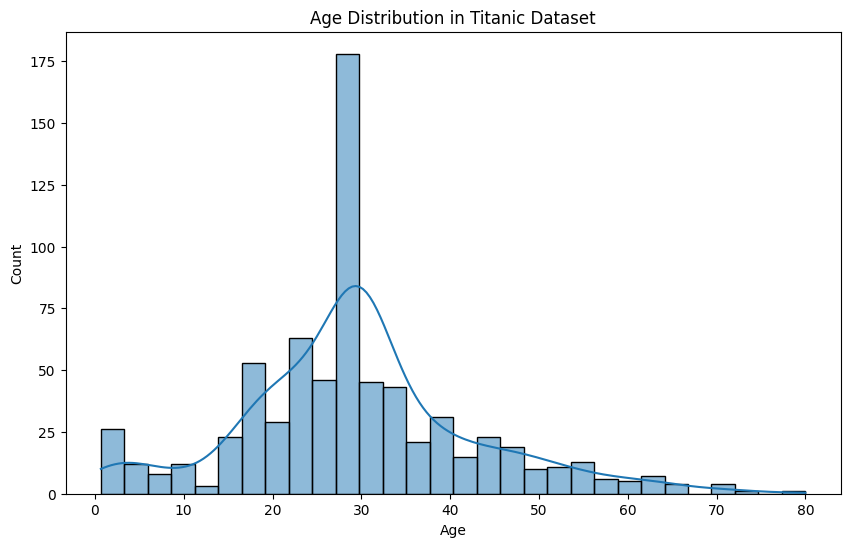

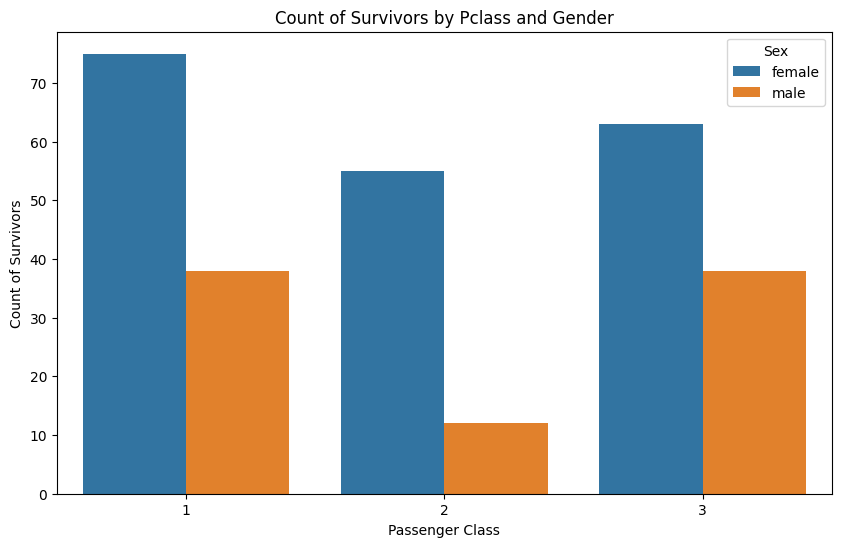

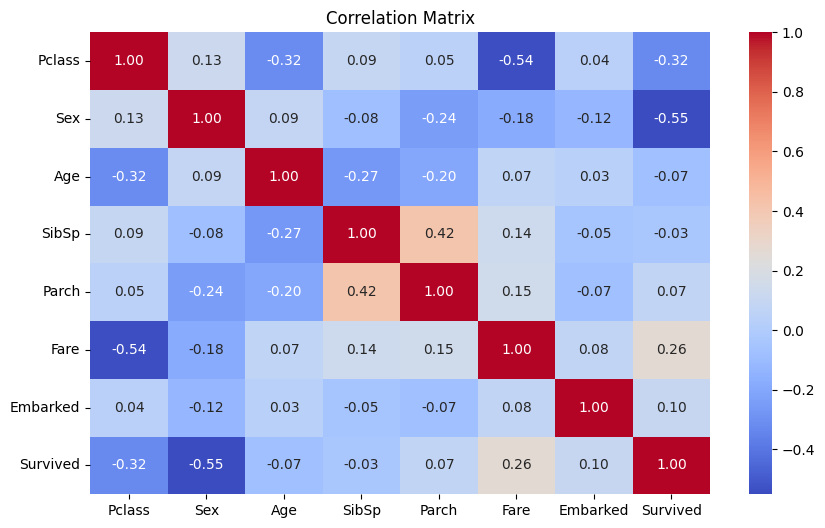

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Display statistical summaries
pd.set_option('max_colwidth', None)  
pd.set_option('display.width', 1000)  
print("Train Data Description:")
print(train_data.describe())

# Visualization 1: Age distribution
plt.figure(figsize=(10,6))
sns.histplot(train_data['Age'].dropna(), kde=True, bins=30)
plt.title('Age Distribution in Titanic Dataset')
plt.xlabel('Age')
plt.show()

# Visualization 2: Count of Survivors by Pclass and Gender
survivors = train_data[train_data['Survived'] == 1]
plt.figure(figsize=(10, 6))
plot = sns.countplot(x='Pclass', hue='Sex', data=survivors)
plot.legend(title='Sex', labels=['female', 'male'])
plt.title('Count of Survivors by Pclass and Gender')
plt.xlabel('Passenger Class')
plt.ylabel('Count of Survivors')
plt.show()


# Visualization 3: Correlation matrix of numerical features
plt.figure(figsize=(10,6))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


## Part 3 - Experiments
You could add as many code cells as needed

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, make_scorer
import pandas as pd

# Custom transformer to add FamilySize feature
from sklearn.base import BaseEstimator, TransformerMixin

class FamilySizeAdder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X = X.copy()
        X['FamilySize'] = X['SibSp'] + X['Parch'] + 1
        return X

# Define the pipeline for RandomForest WITH feature engineering
rf_pipeline_with_fe = Pipeline([
    ('family_size', FamilySizeAdder()),          # Add FamilySize feature
    ('scaler', StandardScaler()),                # Standard scaling
    ('var_thresh', VarianceThreshold(threshold=0.01)),  # Feature selection
    ('rf_classifier', RandomForestClassifier(random_state=42))  # Random Forest Classifier
])

# Define the pipeline for RandomForest WITHOUT feature engineering
rf_pipeline_without_fe = Pipeline([
    ('rf_classifier', RandomForestClassifier(random_state=42))  # Random Forest Classifier only
])

# Define the pipeline for KNeighbors WITH feature engineering
knn_pipeline_with_fe = Pipeline([
    ('family_size', FamilySizeAdder()),          # Add FamilySize feature
    ('scaler', StandardScaler()),                # Standard scaling
    ('var_thresh', VarianceThreshold(threshold=0.01)),  # Feature selection
    ('knn_classifier', KNeighborsClassifier())   # KNeighbors Classifier
])

# Define the pipeline for KNeighbors WITHOUT feature engineering
knn_pipeline_without_fe = Pipeline([
    ('knn_classifier', KNeighborsClassifier())   # KNeighbors Classifier only
])

# Parameter grid for RandomForest
rf_params = {
    'rf_classifier__n_estimators': [100, 200],
    'rf_classifier__max_depth': [5, 10, 15]
}

# Parameter grid for KNeighbors
knn_params = {
    'knn_classifier__n_neighbors': [3, 5, 7],
    'knn_classifier__weights': ['uniform', 'distance']
}

# Define f1 binary scorer
f1_scorer = make_scorer(f1_score, average='binary')

# GridSearchCV for RandomForest WITH feature engineering
rf_grid_search_with_fe = GridSearchCV(rf_pipeline_with_fe, rf_params, cv=5, scoring=f1_scorer, return_train_score=True)
rf_grid_search_with_fe.fit(train_data.drop('Survived', axis=1), train_data['Survived'])

# GridSearchCV for RandomForest WITHOUT feature engineering
rf_grid_search_without_fe = GridSearchCV(rf_pipeline_without_fe, rf_params, cv=5, scoring=f1_scorer, return_train_score=True)
rf_grid_search_without_fe.fit(train_data.drop('Survived', axis=1), train_data['Survived'])

# GridSearchCV for KNeighbors WITH feature engineering
knn_grid_search_with_fe = GridSearchCV(knn_pipeline_with_fe, knn_params, cv=5, scoring=f1_scorer, return_train_score=True)
knn_grid_search_with_fe.fit(train_data.drop('Survived', axis=1), train_data['Survived'])

# GridSearchCV for KNeighbors WITHOUT feature engineering
knn_grid_search_without_fe = GridSearchCV(knn_pipeline_without_fe, knn_params, cv=5, scoring=f1_scorer, return_train_score=True)
knn_grid_search_without_fe.fit(train_data.drop('Survived', axis=1), train_data['Survived'])

# Get cross-validation results for RandomForest
rf_cv_results_with_fe = pd.DataFrame(rf_grid_search_with_fe.cv_results_)
rf_cv_results_without_fe = pd.DataFrame(rf_grid_search_without_fe.cv_results_)

# Get cross-validation results for KNeighbors
knn_cv_results_with_fe = pd.DataFrame(knn_grid_search_with_fe.cv_results_)
knn_cv_results_without_fe = pd.DataFrame(knn_grid_search_without_fe.cv_results_)

# Selecting the most relevant columns for viewing (RandomForest)
rf_results_summary_with_fe = rf_cv_results_with_fe[[
    'param_rf_classifier__max_depth', 'param_rf_classifier__n_estimators',
    'mean_test_score', 'std_test_score', 'mean_train_score', 'std_train_score'
]].copy()

rf_results_summary_without_fe = rf_cv_results_without_fe[[
    'param_rf_classifier__max_depth', 'param_rf_classifier__n_estimators',
    'mean_test_score', 'std_test_score', 'mean_train_score', 'std_train_score'
]].copy()

# Selecting the most relevant columns for viewing (KNeighbors)
knn_results_summary_with_fe = knn_cv_results_with_fe[[
    'param_knn_classifier__n_neighbors', 'param_knn_classifier__weights',
    'mean_test_score', 'std_test_score', 'mean_train_score', 'std_train_score'
]].copy()

knn_results_summary_without_fe = knn_cv_results_without_fe[[
    'param_knn_classifier__n_neighbors', 'param_knn_classifier__weights',
    'mean_test_score', 'std_test_score', 'mean_train_score', 'std_train_score'
]].copy()

# Adding a model column to distinguish the results
rf_results_summary_with_fe.loc[:, 'Model'] = 'RandomForest_with_FE'
rf_results_summary_without_fe.loc[:, 'Model'] = 'RandomForest_without_FE'
knn_results_summary_with_fe.loc[:, 'Model'] = 'KNeighbors_with_FE'
knn_results_summary_without_fe.loc[:, 'Model'] = 'KNeighbors_without_FE'

# Combine both results into one DataFrame
combined_cv_results = pd.concat([rf_results_summary_with_fe, rf_results_summary_without_fe,
                                 knn_results_summary_with_fe, knn_results_summary_without_fe], ignore_index=True)

# Display the combined DataFrame
pd.set_option('display.width', 1000)
print(combined_cv_results)



    param_rf_classifier__max_depth  param_rf_classifier__n_estimators  mean_test_score  std_test_score  mean_train_score  std_train_score                    Model  param_knn_classifier__n_neighbors param_knn_classifier__weights
0                              5.0                              100.0         0.754407        0.026983          0.793476         0.006653     RandomForest_with_FE                                NaN                           NaN
1                              5.0                              200.0         0.751804        0.029858          0.793526         0.009081     RandomForest_with_FE                                NaN                           NaN
2                             10.0                              100.0         0.763700        0.023657          0.929733         0.004986     RandomForest_with_FE                                NaN                           NaN
3                             10.0                              200.0         0.763112  

In [5]:
# Gather the results
results = {
    "Model": [
        "RandomForest_with_FE", "RandomForest_without_FE", 
        "KNeighbors_with_FE", "KNeighbors_without_FE"
    ],
    "Best Parameters": [
        rf_grid_search_with_fe.best_params_, rf_grid_search_without_fe.best_params_, 
        knn_grid_search_with_fe.best_params_, knn_grid_search_without_fe.best_params_
    ],
    "Best CV F1 Score": [
        "{:.3f}".format(rf_grid_search_with_fe.best_score_),
        "{:.3f}".format(rf_grid_search_without_fe.best_score_),
        "{:.3f}".format(knn_grid_search_with_fe.best_score_),
        "{:.3f}".format(knn_grid_search_without_fe.best_score_)
    ]
}


# Create a DataFrame
summary_df = pd.DataFrame(results)

# Print the summary DataFrame
print(summary_df)

                     Model                                                           Best Parameters Best CV F1 Score
0     RandomForest_with_FE      {'rf_classifier__max_depth': 10, 'rf_classifier__n_estimators': 100}            0.764
1  RandomForest_without_FE      {'rf_classifier__max_depth': 10, 'rf_classifier__n_estimators': 200}            0.763
2       KNeighbors_with_FE  {'knn_classifier__n_neighbors': 3, 'knn_classifier__weights': 'uniform'}            0.733
3    KNeighbors_without_FE  {'knn_classifier__n_neighbors': 7, 'knn_classifier__weights': 'uniform'}            0.592


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [6]:
# After selecting the best model and hyperparameters from the previous experiments 
# (with or without Feature Engineering)

# Retrieve the best model from GridSearchCV
best_model = rf_grid_search_with_fe.best_estimator_

# Retrain the model on the entire training set using the best combination of hyperparameters and feature engineering
best_model.fit(train_data.drop('Survived', axis=1), train_data['Survived'])

# Make predictions on the training set
predictions_rf = best_model.predict(train_data.drop('Survived', axis=1))

# Calculate and print the F1 Score on the training set
print("RandomForest Train Set F1 Score (Binary): {:.2f}".format(f1_score(train_data['Survived'], predictions_rf, average='binary')))


RandomForest Train Set F1 Score (Binary): 0.91


## Part 5 - Apply on test and show model performance estimation

In [7]:
from sklearn.metrics import accuracy_score, f1_score

# Use the best model from Part 4
# The model should have been selected and retrained on the entire training set as explained in the previous steps
best_model = rf_grid_search_with_fe.best_estimator_  

# Make predictions on the test data, excluding the 'Survived' column which is the target
test_predictions = best_model.predict(test_data.drop('Survived', axis=1))

# Show the first 5 predictions on the test set
print("First 5 predictions on the test set:", test_predictions[:5])

# Calculate the accuracy of the best model on the test set
accuracy = accuracy_score(test_data['Survived'], test_predictions)

# Print the accuracy score on the test set
print("Test set accuracy: {:.2f}".format(accuracy))

# Calculate and print the F1 score of the model on the test set using binary classification
f1 = f1_score(test_data['Survived'], test_predictions, average='binary')
print("RandomForest Test Set F1 Score (Binary): {:.2f}".format(f1))


First 5 predictions on the test set: [0 0 0 1 1]
Test set accuracy: 0.89
RandomForest Test Set F1 Score (Binary): 0.84
